## **Predicting Restaurant Tips Using Multiple Linear Regression**

#### **📝 Description:**
This project uses the popular tips dataset from the Seaborn library to build a Multiple Linear Regression model that predicts the amount of tip given by restaurant customers. The dataset includes both numerical and categorical features such as:

- total_bill: Total cost of the meal
-size: Number of people at the table
- sex, smoker, day, time: Categorical variables influencing tipping behavior

**Key steps in the project include:**

- Data preprocessing using One-Hot Encoding for categorical variables
- Building a regression pipeline using scikit-learn for clean and modular code
- Training a Multiple Linear Regression model to capture relationships
- Model evaluation using Mean Squared Error (MSE) and R² Score
- Saving the trained model with joblib for future use
- Visualizing model performance using Actual vs Predicted and Residual plots
- Making predictions for new customer inputs (e.g., total bill, group size, day)
- This project demonstrates how simple customer and billing attributes can help predict tipping behavior with moderate accuracy.

### **Import Necessory Libraries**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### **Data Loading**

In [33]:
df = sns.load_dataset('tips')

In [34]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
df.shape

(244, 7)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### **Data Cleaning**

In [38]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(1)

In [40]:
df1 = df.drop_duplicates()

In [41]:
df1.duplicated().sum()

np.int64(0)

### **Univeriate Analysis**

In [42]:
categorical_cols = df1.select_dtypes(exclude=[int, float]).columns.tolist()
print(categorical_cols)

['sex', 'smoker', 'day', 'time']


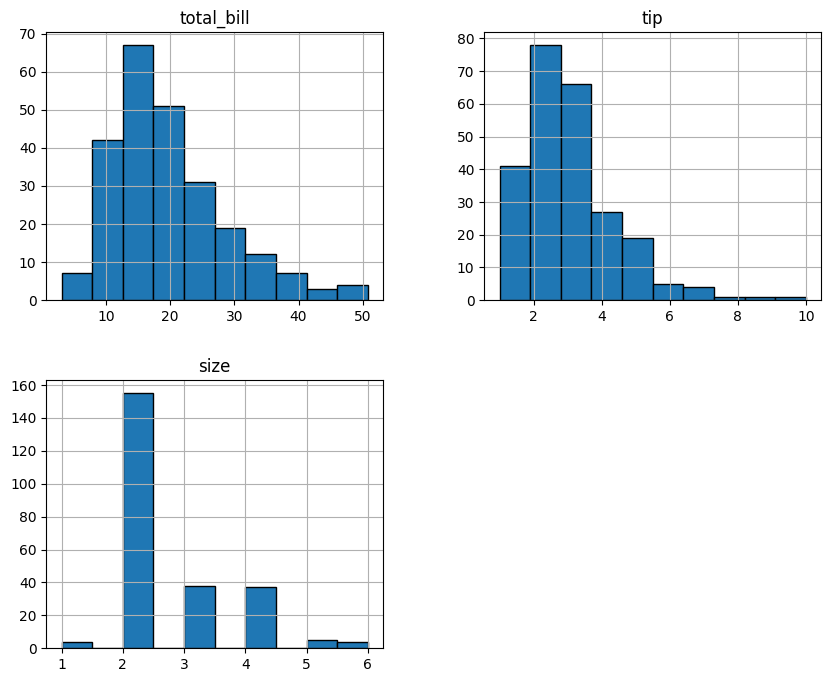

In [43]:
df1.hist(figsize=(10,8), bins=10, edgecolor='k')
plt.show()

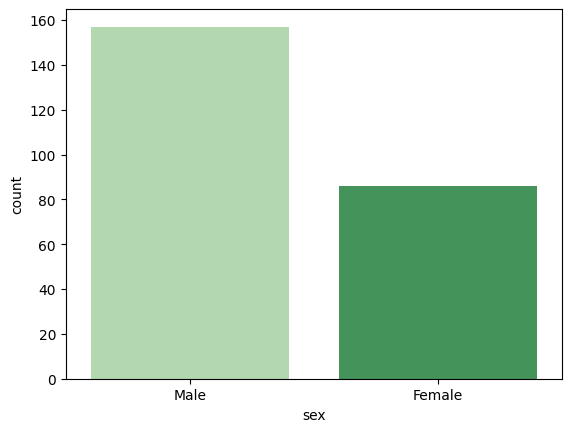

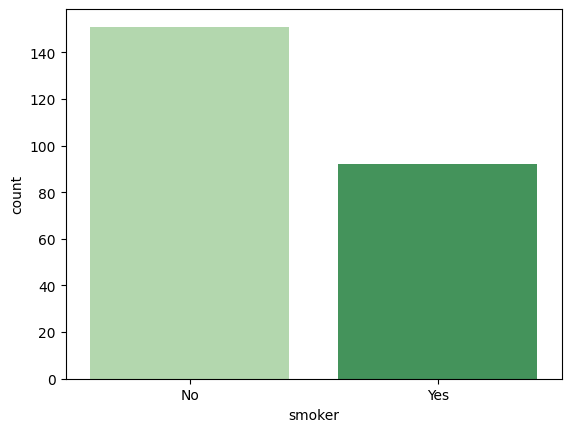

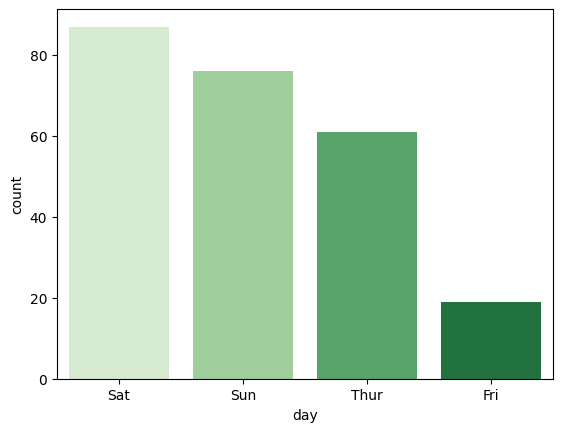

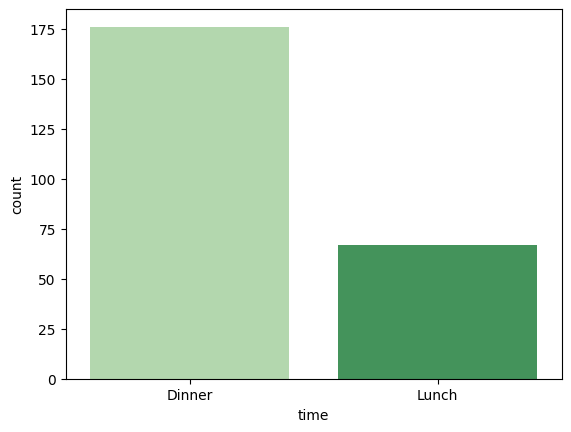

In [44]:
import warnings
warnings.filterwarnings('ignore')
for col in categorical_cols:
    sns.countplot(x=col, data=df1, order= df1[col].value_counts().index, palette='Greens')
    plt.show()

### **Preprcessing**

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)

### **Model Building**

In [48]:
x = df1[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']] # df.drop('tip', axis=1)
y = df1['tip']

In [49]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Initilizing The Model**

In [50]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(
    steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]
)

In [53]:
pipeline.fit(x_train, y_train)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('regressor', LinearRegression())])

In [54]:
y_pred = pipeline.predict(x_test)
y_pred

array([2.88980071, 2.00971754, 2.94645389, 2.11618362, 3.8880845 ,
       4.02028128, 4.18270865, 2.46277506, 2.52346767, 3.30734266,
       2.82351142, 3.92400132, 2.33074483, 5.69776425, 1.86874891,
       2.34224466, 3.94979849, 3.10474901, 2.58356249, 2.46013576,
       3.3679875 , 3.17174072, 2.75473828, 2.01189491, 3.66163804,
       2.6865428 , 2.13794136, 3.28624321, 2.4170365 , 4.42649618,
       1.58613352, 1.80504129, 3.13995978, 2.8778473 , 2.90350193,
       1.96540248, 3.37208729, 2.06885052, 2.42850722, 3.08129577,
       2.09395816, 2.12931829, 4.72534577, 2.33589779, 1.88333923,
       1.17668626, 4.39266625, 3.00419492, 4.59185475])

### **Model Evaluation**

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 3))
print("R² Score:", round(r2, 3))

Mean Squared Error (MSE): 1.173
R² Score: 0.519


### **Visulizing the model**

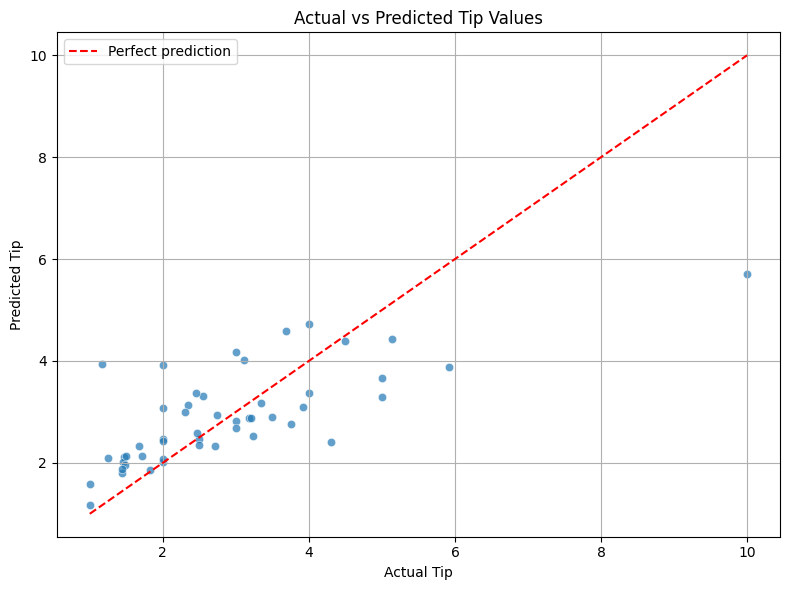

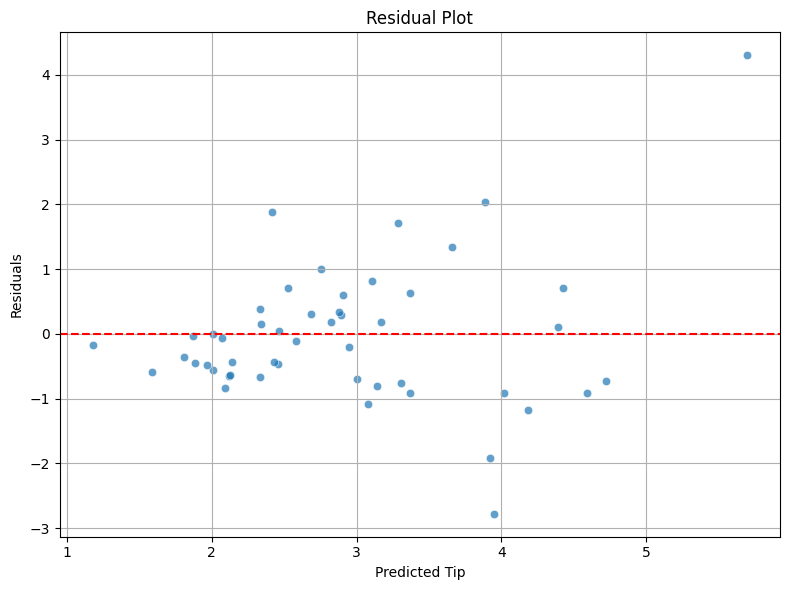

In [57]:
# 1. Actual vs Predicted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect prediction')
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.title('Actual vs Predicted Tip Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Model Dumping to Pickle File**

In [58]:
import joblib
joblib.dump(pipeline, 'tips_prediction.pkl')

['tips_prediction.pkl']

In [59]:
import pickle

model = joblib.load('tips_prediction.pkl')

In [61]:
x_train.head()

,total_bill,sex,smoker,day,time,size
115,17.31,Female,No,Sun,Dinner,2
208,24.27,Male,Yes,Sat,Dinner,2
158,13.39,Female,No,Sun,Dinner,2
132,11.17,Female,No,Thur,Lunch,2
84,15.98,Male,No,Thur,Lunch,2


### **New Data Prediction**

In [63]:
new_data = pd.DataFrame([[50, 'Male', 'Yes', 'Sun', 'Lunch', 3]], columns=['total_bill', 'sex', 'smoker', 'day', 'time', 'size'])

prediction = model.predict(new_data)
prediction

array([5.88769181])

### **✅ Conclusion:**
The Multiple Linear Regression model trained on the Seaborn tips dataset yielded the following results:

- R² Score ≈ 0.51: The model explains around 46% of the variability in tip amounts.
- MSE ≈ 1.178: The average squared prediction error is less than $1, indicating reasonable accuracy for such behavioral data.
- Visual inspection via the Actual vs. Predicted plot shows that the model makes reasonably accurate predictions, though some tips are harder to predict—especially higher tips, which may be influenced by unrecorded factors like service quality.